<a href="https://colab.research.google.com/github/Gab2697/Human-Activity-Recognition/blob/master/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code description: 

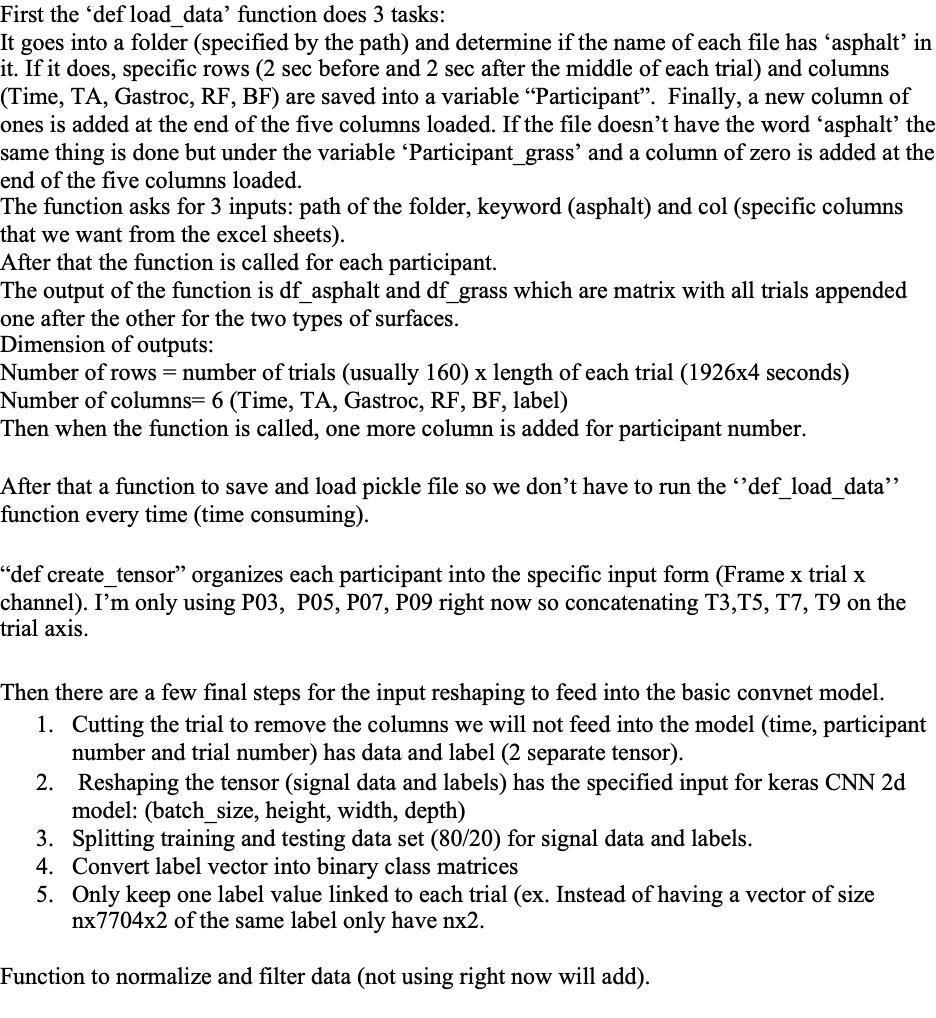

In [2]:
#import
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prepare the data

Function to load data, organize it by surface and add a specifique label depending on the name of the excel file

In [17]:
def load_data(path,keyword,col):

  Window=1926*2 
  df_asphalt = pd.DataFrame()
  df_grass = pd.DataFrame()
  for fname in os.listdir(path):
    if keyword in fname: 
      os.chdir(path)
      pd_xl_file = pd.ExcelFile(fname)
      df = pd_xl_file.parse("Sheet1") 
      dimensions = df.shape
      Middle=int(dimensions[0]/2)
      Participant=pd.read_excel(fname,sheet_name='Sheet1',  usecols = col)
      Participant['label'] = pd.DataFrame(np.ones(dimensions[0]),dtype=int)
      Participant=Participant.iloc[Middle-Window:Middle+Window]
      df_asphalt = df_asphalt.append(Participant)
      

    else:
      os.chdir(path)
      pd_xl_file_grass = pd.ExcelFile(fname)
      df2 = pd_xl_file_grass.parse("Sheet1") 
      dimensions_grass = df2.shape
      Middle_grass=int(dimensions_grass[0]/2)
      Participant_grass=pd.read_excel(fname,sheet_name='Sheet1', usecols = col)
      Participant_grass['label'] = pd.DataFrame(np.zeros(dimensions_grass[0]),dtype=int)
      Participant_grass=Participant_grass.iloc[Middle_grass-Window:Middle_grass+Window]
      df_grass = df_grass.append(Participant_grass)
      
  return df_asphalt, df_grass

Call load function and add specific columns (participant and trial number)

In [ ]:
#P01
path1= '/content/drive/MyDrive/Gab/P01/exported-1/'
df_asphalt_1, df_grass_1= load_data(path1,'sidewalk',"A,B,J,R,Z")
df_asphalt_1['participant_number']=1#add column for participant number
df_grass_1['participant_number']=1#add column for participant number

#P03
path3= '/content/drive/MyDrive/Gab/P03/exported-emg/'
df_asphalt_3, df_grass_3= load_data(path3,'asphalt',"A,B,D,L,T")
df_asphalt_3['participant_number']=3
df_grass_3['participant_number']=3

#P05
path5= '/content/drive/MyDrive/Gab/P05/exported-emg-5/'
df_asphalt_5, df_grass_5= load_data(path5,'asphalt',"A,B,D,L,T")
df_asphalt_5['participant_number']=5
df_grass_5['participant_number']=5

#P07
path7= '/content/drive/MyDrive/Gab/P07/exported-emg-7/'
df_asphalt_7, df_grass_7= load_data(path7,'asphalt',"A,B,D,L,T")
df_asphalt_7['participant_number']=7
df_grass_7['participant_number']=7

#P09
path9= '/content/drive/MyDrive/Gab/P09/exported-emg-9/'
df_asphalt_9, df_grass_9= load_data(path9,'asphalt',"A,B,D,L,T") 
df_asphalt_9['participant_number']=9
df_grass_9['participant_number']=9


Functions to save and open pickle files

In [21]:
#only do once
def save_pickle(path_pickle,T):
  f = open(path_pickle, 'wb')
  pickle.dump(T, f)
  f.close()

  return f 

In [ ]:
#save
f7_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle',df_grass_7)
f7_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle',df_asphalt_7)
f9_g=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle',df_grass_9)
f9_a=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle',df_asphalt_9)

In [5]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  T = pickle.load(f)
  f.close()

  return T

In [6]:
#load
df_grass_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_g.pickle')
df_asphalt_3= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P03_a.pickle')
df_grass_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_g.pickle')
df_asphalt_5= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P05_a.pickle')
df_grass_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_g.pickle')
df_asphalt_7= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P07_a.pickle')
df_grass_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_g.pickle')
df_asphalt_9= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/P09_a.pickle')

Data visualization

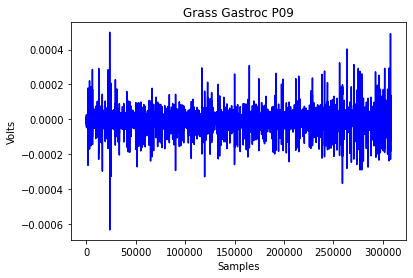

In [64]:
#visualization of data grass
df_grass=df_grass_9
len_grass= list(range(0,len(df_grass.iloc[0:308160,0])))
plt.plot(len_grass,df_grass.iloc[0:308160,3],'b') 
# plt.ylim((-0.006,0.006))
plt.title('Grass Gastroc P09') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

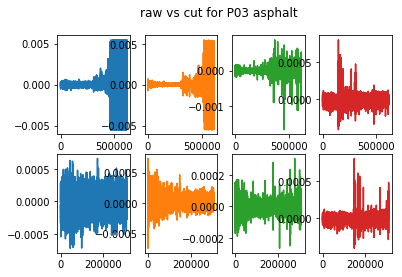

In [75]:
fig, ((ax1, ax2, ax3, ax4), (ax1_cut, ax2_cut, ax3_cut, ax4_cut)) = plt.subplots(2, 4)
fig.suptitle('raw vs cut for P03 asphalt')
ax1.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,1])
ax2.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,2], 'tab:orange')
ax3.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,3], 'tab:green')
ax4.plot(list(range(0,len(df_asphalt.iloc[:,0]))),df_asphalt.iloc[:,4], 'tab:red')

ax1_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,1])
ax2_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,2], 'tab:orange')
ax3_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,3], 'tab:green')
ax4_cut.plot(list(range(0,len(df_asphalt.iloc[0:308160,0]))),df_asphalt.iloc[0:308160,4], 'tab:red')

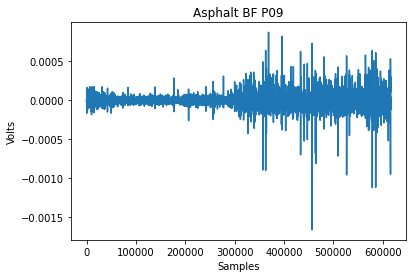

In [67]:
#visualization of data aspahlt
df_asphalt=df_asphalt_9
len_asphalt= list(range(0,len(df_asphalt.iloc[:,0])))
plt.plot(len_asphalt,df_asphalt.iloc[:,3]) 
plt.title('Asphalt BF P09') 
# plt.ylim((-0.006,0.006))
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

Filtering EMG signals with banpass

In [70]:
def filteremg(emg, Fs=1926, high_band=20, low_band=500):
    #variables
    time=emg.iloc[:,0]
    TA=emg.iloc[:,1]
    Gastroc=emg.iloc[:,2]
    RF=emg.iloc[:,3]
    BF=emg.iloc[:,4]
  
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(Fs/2)
    low_band = low_band/(Fs/2)
    
    # create bandpass filter for EMG
    b1, a1 = signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filt_TA = signal.filtfilt(b1, a1, TA)
    emg_filt_Gastroc= signal.filtfilt(b1, a1, Gastroc) 
    emg_filt_RF = signal.filtfilt(b1, a1, RF) 
    emg_filt_BF = signal.filtfilt(b1, a1, BF)     

    return emg_filt_TA,emg_filt_Gastroc,emg_filt_RF,emg_filt_BF

In [71]:
#call function filtering
df_grass_3_filt=filteremg(emg=df_grass_3, Fs=1926, high_band=20, low_band=500)
df_asphalt_3_filt=filteremg(emg=df_asphalt_3, Fs=1926, high_band=20, low_band=500)

df_grass_5_filt=filteremg(emg=df_grass_5, Fs=1926, high_band=20, low_band=500)
df_asphalt_5_filt=filteremg(emg=df_asphalt_5, Fs=1926, high_band=20, low_band=500)

df_grass_7_filt=filteremg(emg=df_grass_7, Fs=1926, high_band=20, low_band=500)
df_asphalt_7_filt=filteremg(emg=df_asphalt_7, Fs=1926, high_band=20, low_band=500)

df_grass_9_filt=filteremg(emg=df_grass_9, Fs=1926, high_band=20, low_band=500)
df_asphalt_9_filt=filteremg(emg=df_asphalt_9, Fs=1926, high_band=20, low_band=500)

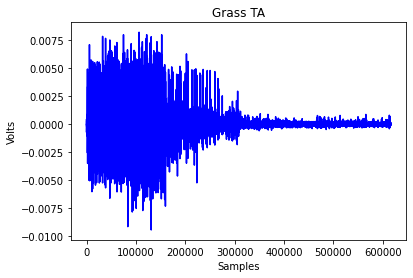

In [102]:
#visualization of data P03 grass
df_grass=df_grass_3_filt[3]
len_grass= list(range(0,len(df_grass)))
plt.plot(len_grass,df_grass,'b') 
plt.title('Grass TA') 
plt.xlabel('Samples')
plt.ylabel('Volts')
plt.show()

Normalize data to be betwen 0 and 1

In [79]:
#max normal=[0,1] interval
def normalization(emg):
#variables
    TA=emg[0]
    Gastroc=emg[1]
    RF=emg[2]
    BF=emg[3]
#TA
    max_data=max(TA)
    min_data=min(TA)
    emg_df_TA = pd.DataFrame(TA)
    emg_normalized_TA=[]
    #itterer pour chaque column 
    for i in range(0,len(emg_df_TA)):
      EMG_norm_TA=(emg_df_TA.iloc[i]-min_data)/(max_data-min_data)
      emg_normalized_TA.append(EMG_norm_TA)# adding the element to the array
#Gastroc
    max_data=max(Gastroc)
    min_data=min(Gastroc)
    emg_df_Gastroc = pd.DataFrame(Gastroc)
    emg_normalized_Gastroc=[]
    #itterer pour chaque column 
    for i in range(0,len(emg_df_Gastroc)):
      EMG_norm_Gastroc=(emg_df_Gastroc.iloc[i]-min_data)/(max_data-min_data)
      emg_normalized_Gastroc.append(EMG_norm_Gastroc)# adding the element to the array
#RF
    max_data=max(RF)
    min_data=min(RF)
    emg_df_RF = pd.DataFrame(RF)
    emg_normalized_RF=[]
    #itterer pour chaque column 
    for i in range(0,len(emg_df_RF)):
      EMG_norm_RF=(emg_df_RF.iloc[i]-min_data)/(max_data-min_data)
      emg_normalized_RF.append(EMG_norm_RF)# adding the element to the array
#BF
    max_data=max(BF)
    min_data=min(BF)
    emg_df_BF = pd.DataFrame(BF)
    emg_normalized_BF=[]
    #itterer pour chaque column 
    for i in range(0,len(emg_df_BF)):
      EMG_norm_BF=(emg_df_BF.iloc[i]-min_data)/(max_data-min_data)
      emg_normalized_BF.append(EMG_norm_BF)# adding the element to the array

    return emg_normalized_TA,emg_normalized_Gastroc,emg_normalized_RF,emg_normalized_BF

In [80]:
#call normalization function
df_grass_3_norm=normalization(df_grass_3_filt) 
df_asphalt_3_norm=normalization(df_asphalt_3_filt) 

df_grass_5_norm=normalization(df_grass_5_filt) 
df_asphalt_5_norm=normalization(df_aspahlt_5_filt)

df_grass_7_norm=normalization(df_grass_7_filt) 
df_asphalt_7_norm=normalization(df_aspahlt_7_filt)

df_grass_9_norm=normalization(df_grass_9_filt) 
df_asphalt_9_norm=normalization(df_aspahlt_9_filt)

NameError: ignored

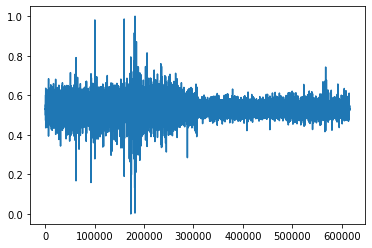

In [82]:
plt.plot(df_grass_3_norm[1])
plt.show()

Creating a tensor with specific shape (frame x trial x channel)

In [8]:
def create_tensor(df_a,df_g):
  #tensor asphalt
  trials_a=len(df_a)/(1926*4) # how many trials-80
  T_asphalt=np.stack(np.split(df_a.values, trials_a), axis=1)
  #tensor grass
  trials_g=len(df_g)/(1926*4) # how many trials
  T_grass=np.stack(np.split(df_g.values, trials_g), axis=1)
  #tensor both conditions
  a=tf.constant(T_asphalt)
  g=tf.constant(T_grass)
  T = tf.concat([a, g], axis=1)

  return T

In [30]:
# T1=create_tensor(df_asphalt_1,df_grass_1)
# print("T1 shape:", T1.shape)

T3=create_tensor(df_asphalt_3,df_grass_3)
print("T3 shape:", T3.shape)

T5=create_tensor(df_asphalt_5,df_grass_5)
print("T5 shape:", T5.shape)

T7=create_tensor(df_asphalt_7,df_grass_7)
print("T7 shape:", T7.shape)

T9=create_tensor(df_asphalt_9,df_grass_9)
print("T9 shape:", T9.shape)

TT = tf.concat([T3,T5,T7,T9], axis=1)
print("Tensor_all shape:", TT.shape)

T3 shape: (7704, 160, 7)
T5 shape: (7704, 160, 7)
T7 shape: (7704, 161, 7)
T9 shape: (7704, 160, 7)
Tensor_all shape: (7704, 641, 7)


Final input data and label reshaping

In [32]:
from tensorflow.keras.utils import to_categorical

#========Initial cutting========
#X-data with shape ((1926frames x 4sec)x(80trials x 2surfaces x n-participants) x 4channels)
X=TT[:, :, 1:5].numpy() #size: (7704, 320, 4)
#Y-categorical encoded label = 1 for asphalt and 0 for grass 
y=TT[:,:,5].numpy() 
#number trials
num_trials= TT.shape[1]

#========Sreshaping into the specific intut format========S 
#keras CNN is looking for X= (batch_size, height, width,depth)
X_reshape = X.reshape((num_trials,7704, 4, 1))
y=y.reshape((num_trials,7704,1))
print("Data shape:", X_reshape.shape) 
print("Label shape:", y.shape)

#========Splitting the data into training and testing sets========S
#data set for training and testing the model
train_size= int(0.8*num_trials) 
X_train= X_reshape[0:train_size,:,:,:]
X_test=X_reshape[train_size:num_trials,:,:,:]
#labels for train and test
y_train=y[0:train_size,:,:] 
y_test=y[train_size:num_trials,:,:]

# ========convert class vectors to binary class matrices========
label_train = to_categorical(y_train, 2)
label_test = to_categorical(y_test, 2)

#========only keeping one label for each trials========
#(instead of a complete vector of the same number)
label_train= label_train[:,0,:]
label_test=label_test[:,0,:]

print("Data shape train:",X_train.shape,"Data shape test:",X_test.shape,"Label shape train:",label_train.shape,"Label shape test:",label_test.shape)

Data shape: (641, 7704, 4, 1)
Label shape: (641, 7704, 1)
Data shape train: (512, 7704, 4, 1) Data shape test: (129, 7704, 4, 1) Label shape train: (512, 2) Label shape test: (129, 2)


#Basic Convnet

In [ ]:
#batch size=  number of trials for all participant and all surfaces
#count the total number of trial for all participant--->not same number for every participant
number_trials_all= 

In [33]:
from keras import layers 
from keras import models

#Instantiating a small convnet
model = models.Sequential()
#filter size: 32, kenel of 3x3, input shape without the batch_size (one trial), padding= with zero padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(7704,4,1),padding='same')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7704, 4, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3852, 2, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3852, 2, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1926, 1, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1926, 1, 64)       18496     
                                                                 
Total params: 28,064
Trainable params: 28,064
Non-traina

In [34]:
#Adding a classifier on top of the convnet
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(2, activation='sigmoid')) #last layer has 2 output options
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7704, 4, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3852, 2, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3852, 2, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1926, 1, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1926, 1, 64)       18496     
                                                                 
 flatten (Flatten)           (None, 123264)            0

In [35]:
# testing CNN model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
history= model.fit(X_train, label_train, epochs=5, batch_size=num_trials) 

Epoch 1/5
1/1 [==============================] - 25s 25s/step - loss: 0.6931 - accuracy: 0.4922
Epoch 2/5
1/1 [==============================] - 18s 18s/step - loss: 0.6940 - accuracy: 0.5039
Epoch 3/5
1/1 [==============================] - 18s 18s/step - loss: 0.6989 - accuracy: 0.4961
Epoch 4/5
1/1 [==============================] - 18s 18s/step - loss: 0.6933 - accuracy: 0.4961
Epoch 5/5
1/1 [==============================] - 18s 18s/step - loss: 0.6931 - accuracy: 0.5039


In [37]:
#test accuracy
test_loss, test_acc = model.evaluate(X_test, label_test)
test_acc

5/5 [==============================] - 2s 288ms/step - loss: 0.6933 - accuracy: 0.4884


0.4883720874786377

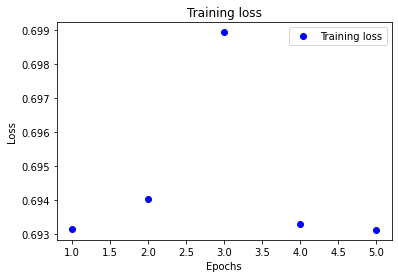

In [38]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #“bo” is for “blue dot.”
plt.title('Training loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

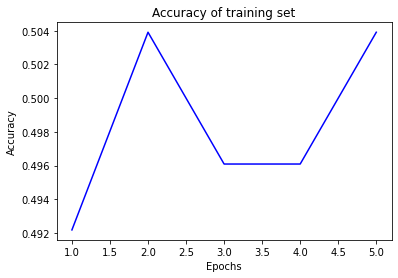

In [39]:
accuracy_values = history_dict['accuracy']
plt.plot(epochs, accuracy_values, 'b', label='Validation loss')#“b” is for “solid blue line.”
plt.title('Accuracy of training set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()